Zadanie 3

In [127]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [128]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images.shape

(60000, 28, 28)

In [129]:
test_images.shape

(10000, 28, 28)

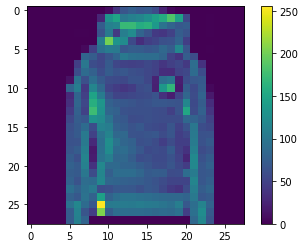

In [130]:
plt.figure()
plt.imshow(train_images[54])
plt.colorbar()
plt.grid(False)
plt.show()

In [131]:
train_images = train_images / 255.0
test_images = test_images / 255.0

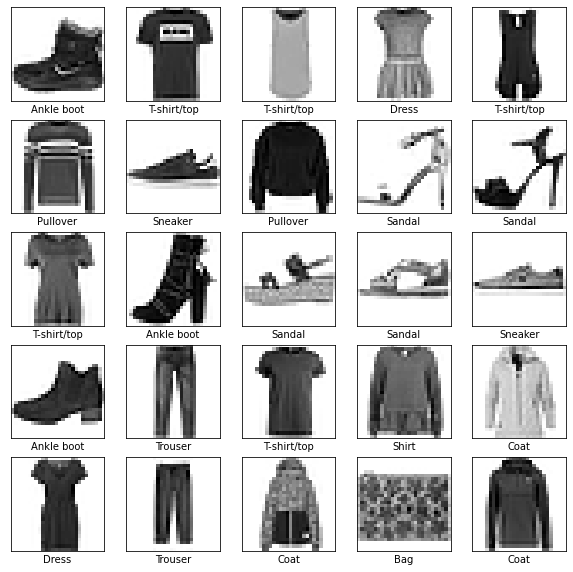

In [132]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [133]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [135]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [136]:
model.fit(train_images, train_labels, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6262 - accuracy: 0.7831
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3864 - accuracy: 0.8615
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3372 - accuracy: 0.8788
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3107 - accuracy: 0.8874
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2969 - accuracy: 0.8913
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2764 - accuracy: 0.8982
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2675 - accuracy: 0.9017
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2522 - accuracy: 0.9060
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2468 - accuracy: 0.9075
Epoch 10/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

In [137]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=3)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.8866999745368958


In [138]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[54]

array([1.4794638e-04, 8.6203290e-06, 9.6246231e-01, 1.4077166e-05,
       3.7306551e-02, 5.7730078e-09, 6.0204653e-05, 1.2763672e-11,
       1.9269906e-07, 4.2784599e-08], dtype=float32)

In [139]:
np.argmax(predictions[54])

2

In [140]:
test_labels[54]

2

In [141]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

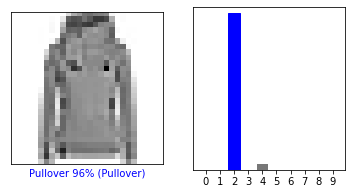

In [142]:
i = 54
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

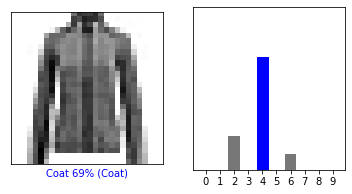

In [143]:
i = 57
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

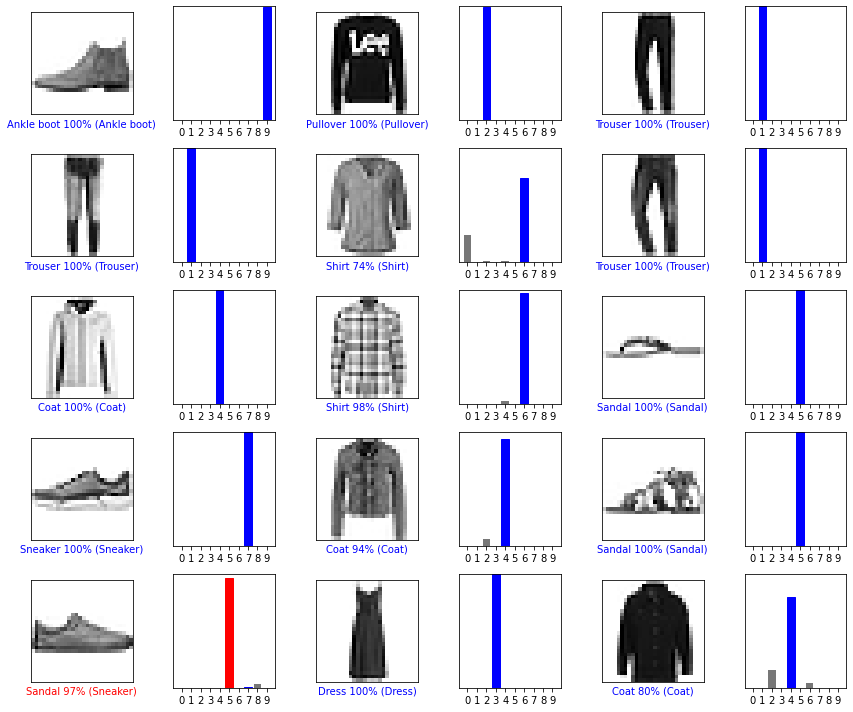

In [144]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [149]:
img = test_images[54]

print(img.shape)

(28, 28)


In [150]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [151]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.4794666e-04 8.6203372e-06 9.6246225e-01 1.4077178e-05 3.7306633e-02
  5.7730292e-09 6.0204762e-05 1.2763671e-11 1.9269903e-07 4.2784677e-08]]


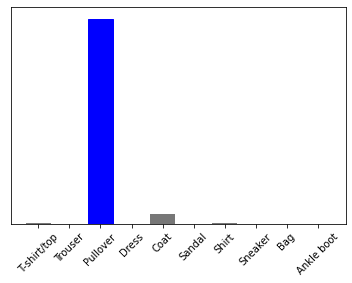

In [ ]:
plot_value_array(54, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [152]:
np.argmax(predictions_single[0])

2